Importing Necessary Libraries

In [252]:

import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import LabelEncoder as le
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [253]:
df = pd.read_csv('Social_Network_Ads.csv')

In [254]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [255]:
df.isnull().count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

Using Raw Data

In [256]:

df['Gender_Encoded'] = le().fit_transform(df["Gender"])
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Encoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [257]:
df1 = df.drop(['Gender'],axis = "columns")
df1

,User ID,Age,EstimatedSalary,Purchased,Gender_Encoded
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [258]:
df1.drop(["User ID"],axis = 'columns',inplace=True)
df1

,Age,EstimatedSalary,Purchased,Gender_Encoded
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


<Axes: >

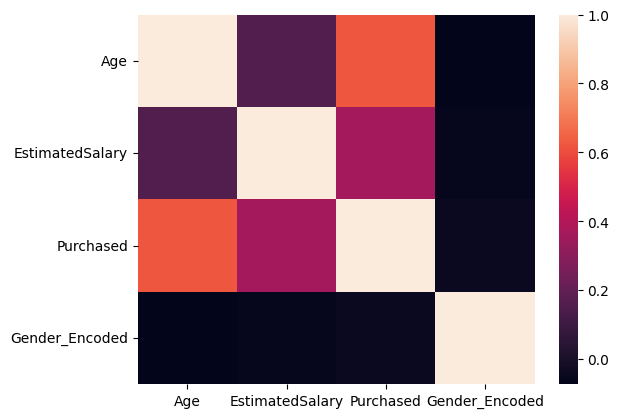

In [270]:
dfcorr = df1.corr()
sb.heatmap(dfcorr)

In [259]:
from sklearn.linear_model import LogisticRegression 

X = df1[['Age','Gender_Encoded','EstimatedSalary']]
#Y = df1.iloc[:,2]
Y = df1['Purchased']
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [260]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


In [261]:
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [262]:
lr.score(X_test,y_test)

0.6416666666666667

In [263]:
df2 = df1.drop(['Gender_Encoded'],axis = "columns")
df2

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [264]:
X1 = df1[['Age','EstimatedSalary']]
#Y = df1.iloc[:,2]
Y1 = df1['Purchased']

In [265]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3)
lr = LogisticRegression()
lr.fit(X1_train,y1_train)


LogisticRegression()

In [266]:
lr.score(X1_test,y1_test)

0.7166666666666667

Using Normalization

In [278]:
# from sklearn.preprocessing import MinMaxScaler
# scalar = MinMaxScaler()
# normalized_X= scalar.fit(X1)
# normalized_X
normalized_X=(X1-X1.mean())/X1.std()

In [279]:
normalized_X

,Age,EstimatedSalary
0,-1.779569,-1.488183
1,-0.253270,-1.458854
2,-1.111813,-0.784307
3,-1.016419,-0.373714
4,-1.779569,0.183521
...,...,...
395,0.796060,-0.842964
396,1.273028,-1.370870
397,1.177635,-1.458854
398,-0.157877,-1.077589


In [280]:
X1_norm_train, X1_norm_test, y1_train, y1_test = train_test_split(normalized_X, Y1, test_size=0.3)
lr = LogisticRegression()
lr.fit(X1_norm_train,y1_train)


LogisticRegression()

In [281]:
lr.score(X1_norm_test,y1_test)

0.8916666666666667